<ipython-input-8-5e14bb963467>:168: RuntimeWarning: All-NaN slice encountered
  dalatobs_max=np.nanmax(arr_max,axis=0)
<ipython-input-8-5e14bb963467>:169: RuntimeWarning: All-NaN slice encountered
  dalatobs_min=np.nanmin(arr_max,axis=0)
<ipython-input-8-5e14bb963467>:168: RuntimeWarning: All-NaN slice encountered
  dalatobs_max=np.nanmax(arr_max,axis=0)
<ipython-input-8-5e14bb963467>:169: RuntimeWarning: All-NaN slice encountered
  dalatobs_min=np.nanmin(arr_max,axis=0)
<ipython-input-8-5e14bb963467>:168: RuntimeWarning: All-NaN slice encountered
  dalatobs_max=np.nanmax(arr_max,axis=0)
<ipython-input-8-5e14bb963467>:169: RuntimeWarning: All-NaN slice encountered
  dalatobs_min=np.nanmin(arr_max,axis=0)
<ipython-input-8-5e14bb963467>:168: RuntimeWarning: All-NaN slice encountered
  dalatobs_max=np.nanmax(arr_max,axis=0)
<ipython-input-8-5e14bb963467>:169: RuntimeWarning: All-NaN slice encountered
  dalatobs_min=np.nanmin(arr_max,axis=0)


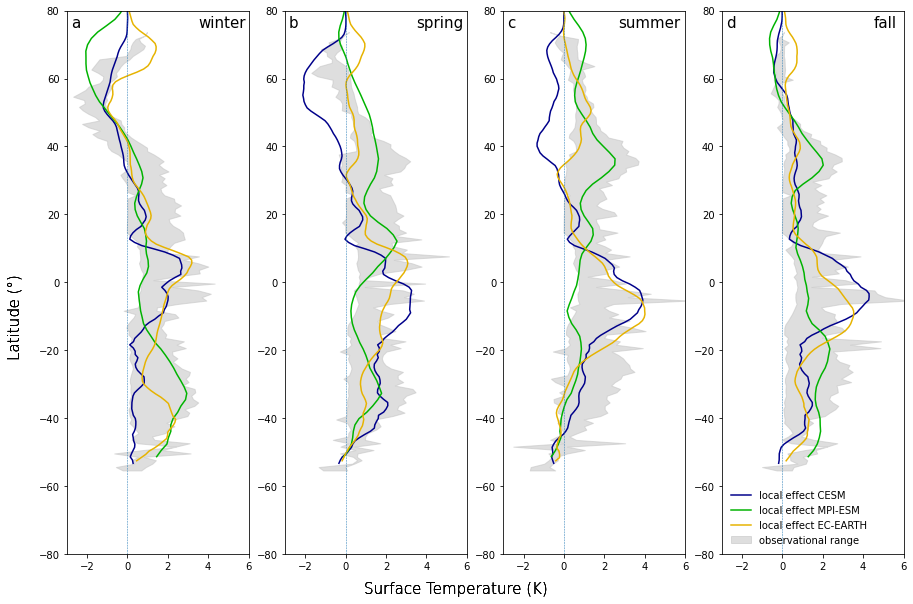

In [8]:
## scrupt to compare Duveiller dataset directly to cesm and mpiesm data using the concept of sensitivities
from func_utils import *
#make flags to change functionality of script
case_flag='crop-frst' ##currently only able to handle crop-ctl or frst-ctl
flag_maps=0
flag_submodel_cesm='atm'
flag_obs='shade'   ##shade or line
list_seas=['DJF','MAM','JJA','SON']
min_lcc=0.0
flag_sens=False
plot_lims=[-3,6]
plt.rcParams['figure.figsize'] = [10, 16]
smth=2

q=0
list_labels=['a','b','c','d']
#read in model data 
outdir='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/cesm/work/postprocessing/signals_seperated/'+case_flag+'/'
for seas in list_seas:
    q=q+1
    if flag_submodel_cesm=='lnd':
        fn_cesm='Lmon/TG/TG_'+case_flag+'_cesm_'+seas+'ensmean_signal-separated.nc'
        var_cesm='TG'
    elif flag_submodel_cesm=='atm':
        fn_cesm='Amon/TS/TS_'+case_flag+'_cesm_'+seas+'ensmean_signal-separated.nc'
        var_cesm='TS'
    ds_cesm=xr.open_dataset(outdir+fn_cesm)
    da_cesm_local=ds_cesm[var_cesm+'_local']
    da_cesm_nonlocal=ds_cesm[var_cesm+'_nonlocal']
    da_cesm_total=ds_cesm[var_cesm+'_total']

    fn_mpiesm='Amon/ts/ts_'+case_flag+'_mpiesm_'+seas+'ensmean_signal-separated.nc'
    ds_mpiesm=xr.open_dataset(outdir+fn_mpiesm)
    da_mpiesm_local=ds_mpiesm['ts_local']
    da_mpiesm_nonlocal=ds_mpiesm['ts_nonlocal']
    da_mpiesm_total=ds_mpiesm['ts_total']
    
    fn_ecearth='Lmon/stl1/interped_stl1_'+case_flag+'_ecearth_'+seas+'ensmean_signal-separated.nc'
    ds_ecearth=xr.open_dataset(outdir+fn_ecearth)
    da_ecearth_local=ds_ecearth['stl1_local']
    da_ecearth_nonlocal=ds_ecearth['stl1_nonlocal']
    da_ecearth_total=ds_ecearth['stl1_total']

    # read in observational data
    outdir_obs = '/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/evaluation/processed_obs/'
    fn_obs='LST_'+seas+'.nc'
    ds_obs=xr.open_dataset(outdir_obs+fn_obs)
    da_obs=ds_obs['Delta_LSTday_ext']
    fn_obs_li='li_TS_seas.nc'
    ds_obs_li=xr.open_dataset(outdir_obs+fn_obs_li)
    if seas=='DJF':
        da_obs_li=ds_obs_li['Tseas_li'][[11,0,1],:].mean('month')
    elif seas=='SON':
        da_obs_li=ds_obs_li['Tseas_li'][[8,9,10],:].mean('month')
    elif seas=='MAM':
        da_obs_li=ds_obs_li['Tseas_li'][[2,3,4],:].mean('month')
    elif seas=='JJA':
        da_obs_li=ds_obs_li['Tseas_li'][[5,6,7],:].mean('month')
    fn_obs_alkama='alkama_TS_seas.nc'
    ds_obs_alkama=xr.open_dataset(outdir_obs+fn_obs_alkama)
    da_obs_alkama=ds_obs_alkama['T'+seas+'_alkama']
    fn_obs_bright='bright_TS_cesm_seas.nc'
    ds_obs_bright=xr.open_dataset(outdir_obs+fn_obs_bright)
    da_obs_bright=ds_obs_bright['T'+seas+'_bright']
    fn_obs_bright2='bright_TS_mpiesm_seas.nc'
    ds_obs_bright2=xr.open_dataset(outdir_obs+fn_obs_bright2)
    da_obs_bright2=ds_obs_bright2['T'+seas+'_bright']
    #convert model data to sensitivities
    ds_lu=xr.open_dataset(outdir_obs+case_flag+'_defor_cesm.nc')
    da_lcc=ds_lu['defor']
    da_lcc_cesm=xr.where(da_lcc<min_lcc,np.nan,da_lcc)
    ds_lu=xr.open_dataset(outdir_obs+case_flag+'_defor_mpiesm.nc')
    da_lcc=ds_lu['defor']
    da_lcc=xr.where(da_lcc<min_lcc,np.nan,da_lcc)
    da_lcc_mpiesm=da_lcc.sortby(["lat"], ascending=True)

    if flag_sens==False:
        da_sens_local_cesm=da_cesm_local.mean('time')[:]
        da_sens_local_mpiesm=da_mpiesm_local.mean('time')[:]
        da_sens_nonlocal_cesm=da_cesm_nonlocal.mean('time')[:]
        da_sens_nonlocal_mpiesm=da_mpiesm_nonlocal.mean('time')[:]
        da_sens_total_cesm=da_cesm_total.mean('time')[:]
        da_sens_total_mpiesm=da_mpiesm_total.mean('time')[:]
        da_sens_local_ecearth=da_ecearth_local[:]
        da_sens_nonlocal_ecearth=da_ecearth_nonlocal[:]
        da_sens_total_ecearth=da_ecearth_total[:]
    else:
        da_sens_local_cesm=da_cesm_local.mean('time')[:]/da_lcc_cesm.values
        da_sens_local_mpiesm=da_mpiesm_local.mean('time')[:]/da_lcc_mpiesm.values
        da_sens_nonlocal_cesm=da_cesm_nonlocal.mean('time')[:]/da_lcc_cesm.values
        da_sens_nonlocal_mpiesm=da_mpiesm_nonlocal.mean('time')[:]/da_lcc_mpiesm.values
        da_sens_total_cesm=da_cesm_total.mean('time')[:]/da_lcc_cesm.values
        da_sens_total_mpiesm=da_mpiesm_total.mean('time')[:]/da_lcc_mpiesm.values
    #plot maps of sensitivity and latitudinal plot
    if flag_maps==1:
        for da in [da_obs,da_sens_local_cesm,da_sens_local_mpiesm,da_sens_local_ecearth]:
            #plot the maps
            cmap = 'coolwarm'
            name = da.name
            projection = ccrs.PlateCarree()
            f, ax = plt.subplots(1,1,subplot_kw={'projection':projection})
            ax.coastlines()
            h=da.plot(ax=ax, cmap=cmap, vmin=-2, vmax=2, add_colorbar=False)
            cbar   = f.colorbar(h, ax=ax, cmap=cmap,spacing='uniform',orientation='horizontal',label = 'degrees C',pad = 0.05,extend='both')
            ax.set_title(name)
            ax.set_aspect('auto')
            ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
            plt.show()
    #plot the lat plot
    if seas=='DJF':
        f, ax = plt.subplots(1,4,sharex=True,figsize=(15,10))
    da_obs=da_obs.sortby(["lat"], ascending=True)
    i=0
    #list_da=[da_sens_local_cesm,da_sens_nonlocal_cesm,da_sens_total_cesm,da_sens_local_mpiesm,da_sens_nonlocal_mpiesm,da_sens_total_mpiesm]
    #label_list=['Local effect cesm','nonlocal effect cesm','total effect cesm','local effect mpiesm','nonlocal effect mpiesm','total effect mpiesm']
    #list_da=[da_sens_local_cesm,da_sens_total_cesm,da_sens_local_mpiesm,da_sens_total_mpiesm]
    list_da=[da_sens_local_cesm,da_sens_local_mpiesm,da_sens_local_ecearth]
    label_list=['local effect CESM','local effect MPI-ESM','local effect EC-EARTH']
    color_list=[(0,0,0.54),(0,0.7,0),(0.9,0.7,0)]
    model_list=['cesm','mpiesm','ecearth']
    for da in list_da:
        i=i+1
        da=da.sortby(["lat"], ascending=True)
        name=da.name
        da=mask_data(da,case_flag,model_list[i-1],'lnd')
        dalat=da.mean(dim='lon')
        dalat[dalat.lat<-60]=np.nan
        ax[q-1].plot(dalat.rolling(lat=int(smth*2),center=True).mean(),dalat.lat,label=label_list[i-1],color=color_list[i-1])  

    if flag_obs=='line':
        dalatobs=da_obs.mean(dim='lon')
        ax.plot(dalatobs.mean('time').rolling(lat=int(smth),center=True).mean(),dalatobs.lat,label='DV')     
        dalatobs_li=da_obs_li.mean(dim='lon')*-1
        ax.plot(dalatobs_li.rolling(lat=int(smth*2),center=True).mean(),dalatobs_li.lat,label='li')  
        dalatobs_alkama=da_obs_alkama.mean(dim='lon')
        ax.plot(dalatobs_alkama.rolling(lat=int(smth/2),center=True).mean(),dalatobs_alkama.lat,label='alkama')  
        dalatobs_bright=da_obs_bright.mean(dim='lon')*-1
        ax.plot(dalatobs_bright.rolling(lat=int(smth*2),center=True).mean(),dalatobs_bright.lat,label='bright_cesm')  
        dalatobs_bright2=da_obs_bright2.mean(dim='lon')*-1
        ax.plot(dalatobs_bright2.rolling(lat=int(smth*2),center=True).mean(),dalatobs_bright2.lat,label='bright_mpiesm')  

        ax[q-1].set_xlim([plot_lims[0],plot_lims[1]])
        ax[q-1].axvline(x=0,linewidth=0.5,linestyle='dashed')
    elif flag_obs=='shade':
        dalatobs=da_obs.mean(dim='lon')
        dalatobs_li=da_obs_li*-1
        dalatobs_alkama=da_obs_alkama.mean(dim='lon')
        dalatobs_bright=da_obs_bright.mean(dim='lon')*-1
        dalatobs_bright2=da_obs_bright2.mean(dim='lon')*-1
        dalatobs_alkama=da_obs_alkama.interp({'lat':dalatobs.lat.values})
        dalatobs_alkama=dalatobs_alkama.mean(dim='lon')
        #dalatobs[:,dalatobs.lat<-60]=np.nan
        #dalatobs_li[dalatobs_li.lat<-60]=np.nan
        #dalatobs_alkama[dalatobs_alkama.lat<-60]=np.nan
        #dalatobs_bright[dalatobs_bright.lat<-60]=np.nan
        #dalatobs_bright2[dalatobs_bright2.lat<-60]=np.nan

        dalatobs_max=np.zeros([1,180])
        dalatobs_min=np.zeros([1,180])
        arr_max=np.zeros([5,len(dalatobs.lat)])
        arr_min=np.zeros([5,len(dalatobs.lat)])
        arr_max[0,:]=dalatobs.values
        arr_max[1,:]=dalatobs_li.values[::-1]
        arr_max[2,:]=dalatobs_bright.values[::-1]
        arr_max[3,:]=dalatobs_bright2.values[::-1]
        arr_max[4,:]=dalatobs_alkama.values
        arr_min=arr_max
        dalatobs_max=np.nanmax(arr_max,axis=0)
        dalatobs_min=np.nanmin(arr_max,axis=0)
        ax[q-1].fill_betweenx(dalatobs.lat,dalatobs_min, dalatobs_max, color='0.75',label='observational range',alpha=0.5) 
        ax[q-1].set_xlim([plot_lims[0],plot_lims[1]])
        ax[q-1].axvline(x=0,linewidth=0.5,linestyle='dashed')
        ax[q-1].set_ylim([-80,80])
        ax[q-1].text(-2.8, 75,list_labels[q-1],fontsize=15,fontweight='normal')
        ax[q-1].text(3.5, 75,seas,fontsize=15,fontweight='normal')

        #plt.ylabel('Latitude (°)')
        #plt.xlabel('Surface Temperature (K)')
        # Reserve space for axis labels
        ax[0].set_xlabel('.', color=(0, 0, 0, 0),size=10)
        ax[0].set_ylabel('.', color=(0, 0, 0, 0),size=10)
        
        # Make common axis labels
        f.text(0.4, 0.07,'Surface Temperature (K)',fontsize=15,fontweight='light')
        f.text(0.07,0.4, 'Latitude (°)', rotation='vertical',fontsize=15,fontweight='light')

plt.legend(loc='lower left', prop={'size': 10},facecolor='white', framealpha=0)
plt.show()
f.savefig(outdir +'/'+ case_flag+ '_evaluation_sensitivity'+str(min_lcc)+'_seas.png', dpi=300)


In [11]:
print(outdir)

/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/cesm/work/postprocessing/signals_seperated/crop-frst/
